# **Task 1 : Data Preparation**

**Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel("/content/heart_disease.xlsx")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,fixed defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,normal,4


# **Task 2 : Exploratory Data Analysis (EDA)**

**Perform exploratory data analysis to understand the structure of the dataset.**

In [3]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [4]:
# Handle the formula cells in 'thal' column (convert to actual values)
# For demonstration, we'll replace formula cells with 'normal'
df['thal'] = df['thal'].apply(lambda x: 'normal' if 'CHOOSE' in str(x) else x)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


**Check for missing values, outliers, and inconsistencies in the data.**

In [6]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [7]:
df['oldpeak'].fillna(df['oldpeak'].median(),inplace=True)

In [8]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [9]:
df['exang'] = df['exang'].replace("TURE", True)
df['exang'] = df['exang'].replace("FALSE", False)
df['exang'] = df['exang'].astype('bool')

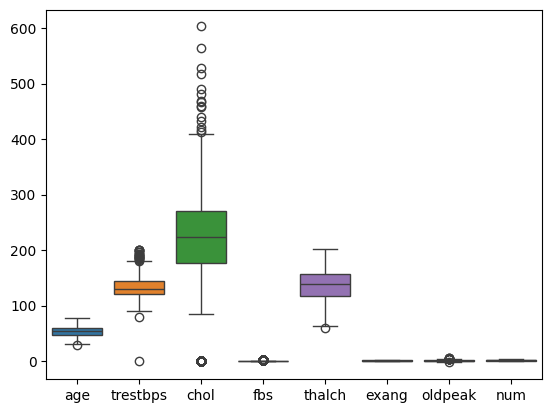

In [10]:
sns.boxplot(data=df)
plt.show()

In [11]:
import numpy as np

column=['age','trestbps','chol','thalch','oldpeak']

for col in column:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  df[col]=np.where(df[col]<lower_bound,lower_bound,df[col])
  df[col]=np.where(df[col]>upper_bound,upper_bound,df[col])
print("Outlier Trated")

Outlier Trated


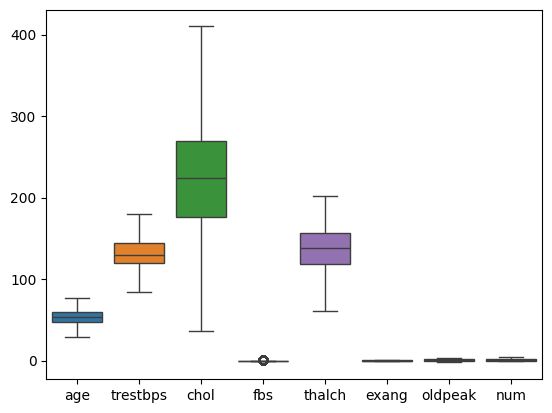

In [12]:
sns.boxplot(data=df)
plt.show()

**Visualize the distribution of features, including histograms, box plots, and correlation matrices.**

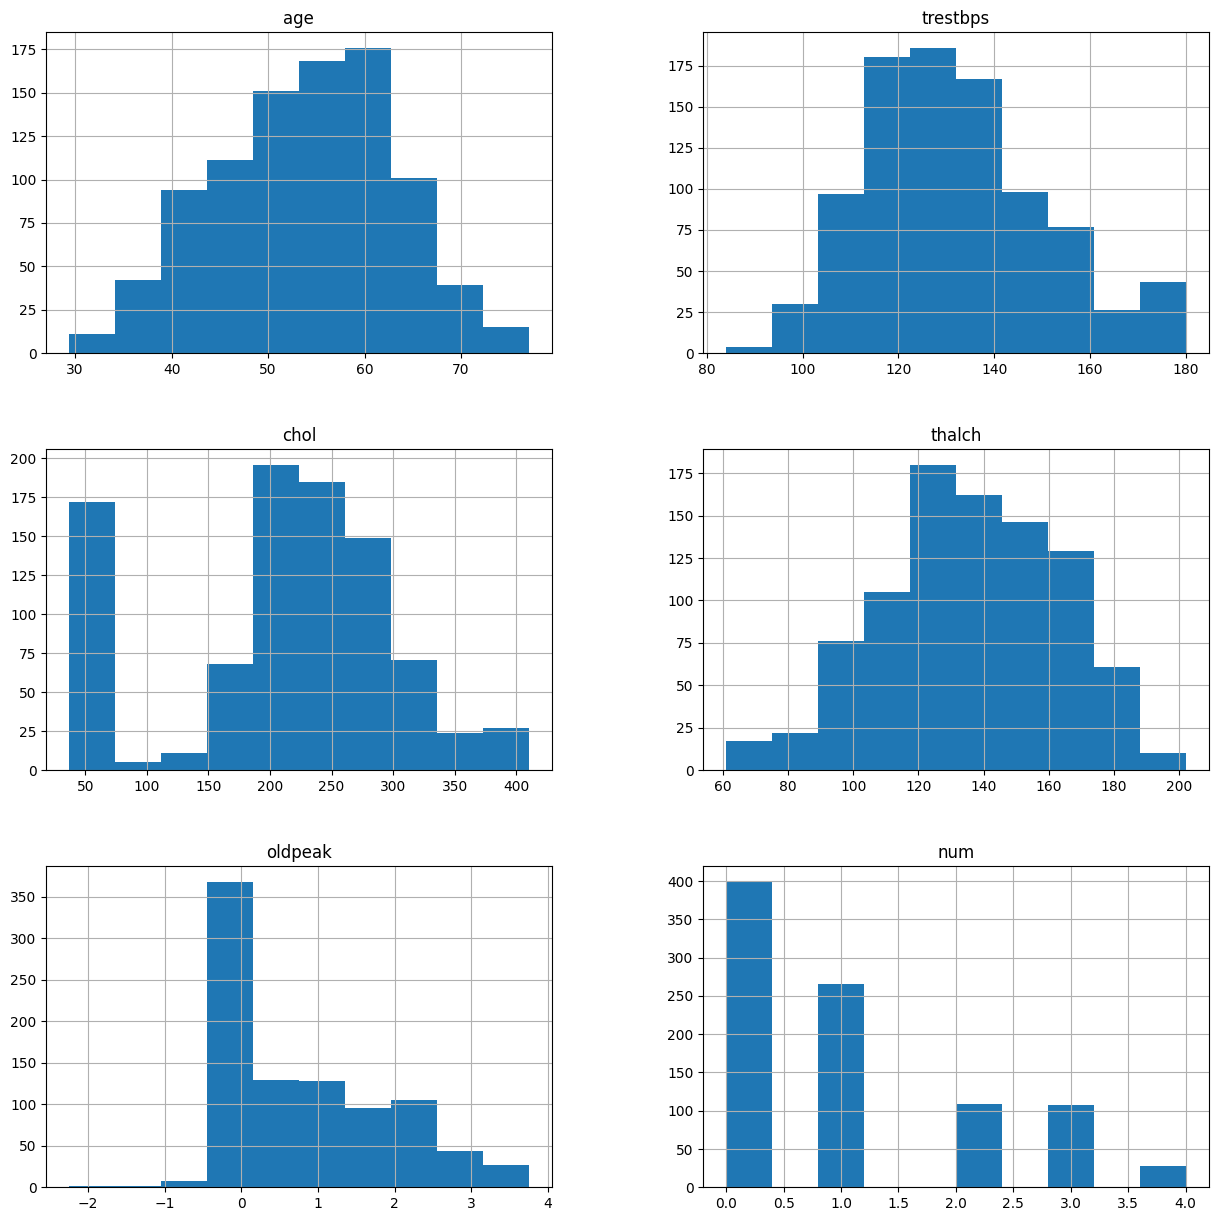

In [13]:
df.hist(figsize=(15,15))
plt.show()

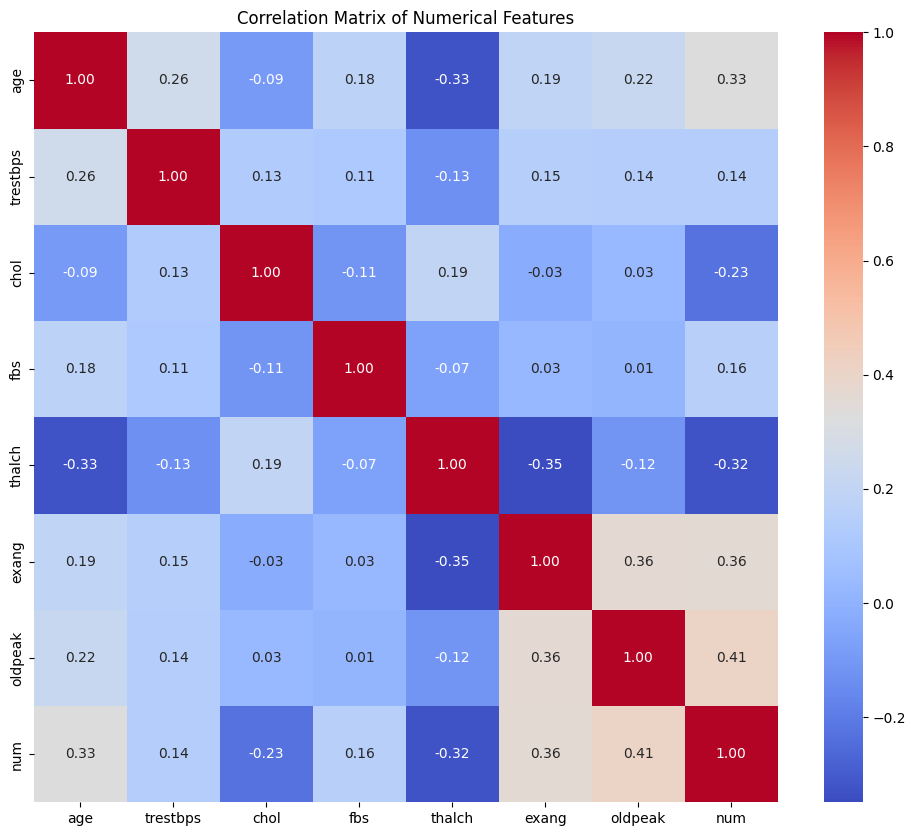

In [14]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

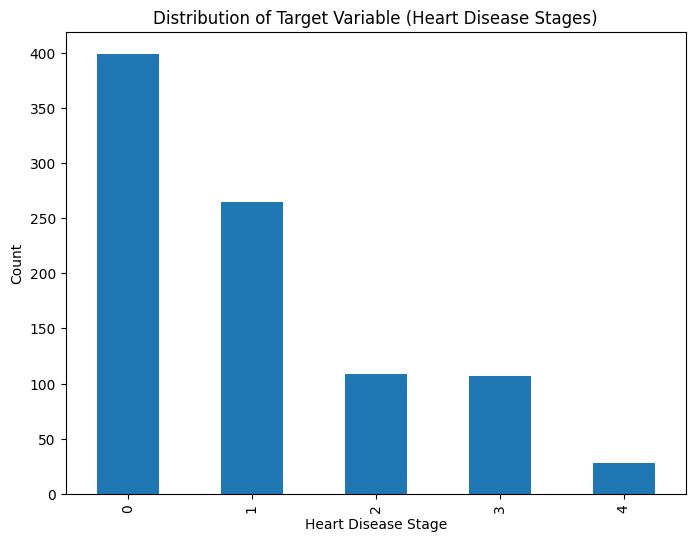

In [15]:
#  Target variable distribution
plt.figure(figsize=(8, 6))
df['num'].value_counts().plot(kind='bar')
plt.title('Distribution of Target Variable (Heart Disease Stages)')
plt.xlabel('Heart Disease Stage')
plt.ylabel('Count')
plt.show()

# **Task 3 : Feature Engineering**

**If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.**

In [16]:
# Encode ecategorical variables
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Create label encoders
from sklearn.preprocessing import LabelEncoder

label_encoder={}
for col in categorical_cols:
  le=LabelEncoder()
  df[col]=le.fit_transform(df[col].astype(str))
  label_encoder[col]=le
label_encoder[col]

LabelEncoder()

In [17]:
# Feature Scaling on numerical columns
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_features=scaler.fit_transform(df[column])
df_scaled=pd.DataFrame(scaled_features,columns=column)
df_scaled

,age,trestbps,chol,thalch,oldpeak
0,1.006104,0.607417,0.264845,0.524203,1.411045
1,-1.397775,0.089009,-0.045006,-0.147763,-0.834669
2,0.350500,0.348213,-0.158618,0.449540,-0.444110
3,-0.195836,-0.792285,-0.220589,2.017461,-0.834669
4,0.350500,-1.207012,-0.065663,-0.371752,0.629927
...,...,...,...,...,...
903,-0.086568,-0.429400,-1.760808,-0.595741,0.629927
904,0.896837,1.696074,-0.385843,-0.595741,2.094523
905,0.241233,1.903437,-1.760808,-0.483747,1.606325
906,0.241233,0.555576,0.006636,-1.155713,-0.346471


In [18]:
# Replace original numerical columns with scaled ones
for col in column:
    df[col] = df_scaled[col]

print("\nData after preprocessing:")
print(df.head())
print(f"\nShape: {df.shape}")


Data after preprocessing:
        age  sex  cp  trestbps      chol  fbs  restecg    thalch  exang  \
0  1.006104    1   3  0.607417  0.264845    1        0  0.524203      0   
1 -1.397775    1   1  0.089009 -0.045006    0        1 -0.147763      0   
2  0.350500    1   0  0.348213 -0.158618    0        1  0.449540      0   
3 -0.195836    1   3 -0.792285 -0.220589    0        0  2.017461      0   
4  0.350500    1   0 -1.207012 -0.065663    0        1 -0.371752      1   

    oldpeak  slope  thal  num  
0  1.411045      0     0    0  
1 -0.834669      1     0    0  
2 -0.444110      1     0    0  
3 -0.834669      1     0    0  
4  0.629927      1     0    0  

Shape: (908, 13)


In [19]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1.006104,1,3,0.607417,0.264845,1,0,0.524203,0,1.411045,0,0,0
1,-1.397775,1,1,0.089009,-0.045006,0,1,-0.147763,0,-0.834669,1,0,0
2,0.350500,1,0,0.348213,-0.158618,0,1,0.449540,0,-0.444110,1,0,0
3,-0.195836,1,3,-0.792285,-0.220589,0,0,2.017461,0,-0.834669,1,0,0
4,0.350500,1,0,-1.207012,-0.065663,0,1,-0.371752,1,0.629927,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,-0.086568,1,0,-0.429400,-1.760808,0,1,-0.595741,0,0.629927,2,1,4
904,0.896837,1,0,1.696074,-0.385843,0,2,-0.595741,1,2.094523,1,0,4
905,0.241233,1,2,1.903437,-1.760808,0,0,-0.483747,1,1.606325,0,2,4
906,0.241233,1,2,0.555576,0.006636,1,2,-1.155713,1,-0.346471,0,1,4


# **Task 4 : Decision Tree Classification**

**Split the dataset into training and testing sets (e.g., using an 80-20 split).**

In [20]:
# Seperate X and Y
x=df.drop('num', axis=1)
y=df['num']

In [21]:
# Split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42, stratify=y)


**Implement a Decision Tree Classification model using a library like scikit-learn.**

In [22]:
# Build the Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)
dt.score(x_train,y_train)*100,dt.score(x_test,y_test)*100

(100.0, 46.15384615384615)

In [23]:
# Make Prediction
y_pred=dt.predict(x_test)
y_pred

array([1, 2, 1, 1, 2, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 0, 1, 1, 1, 2, 1,
       1, 1, 0, 3, 2, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 1, 0, 2,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 4, 3, 1, 3, 2, 0, 3, 1, 2, 0, 3,
       0, 0, 1, 4, 1, 3, 1, 0, 3, 0, 1, 0, 1, 0, 2, 1, 2, 0, 0, 1, 0, 0,
       3, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 2, 0, 4, 3, 0, 0, 0, 2, 1, 1,
       4, 0, 4, 0, 1, 0, 0, 0, 0, 0, 3, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 4,
       0, 1, 1, 0, 3, 1, 0, 3, 0, 2, 0, 2, 3, 0, 1, 0, 1, 0, 1, 3, 1, 0,
       3, 3, 2, 2, 0, 0, 1, 1, 2, 0, 0, 1, 3, 3, 1, 1, 1, 0, 0, 3, 0, 2,
       1, 0, 0, 0, 0, 4])

**Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).**


     Initial Decision Tree Performance     
Accuracy: 46.1538
Precision: 46.7992
Recall: 46.1538
F1-Score: 46.4323
ROC-AUC: 62.9362

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.66      0.68        80
           1       0.40      0.43      0.42        53
           2       0.17      0.18      0.18        22
           3       0.16      0.14      0.15        21
           4       0.14      0.17      0.15         6

    accuracy                           0.46       182
   macro avg       0.32      0.32      0.32       182
weighted avg       0.47      0.46      0.46       182



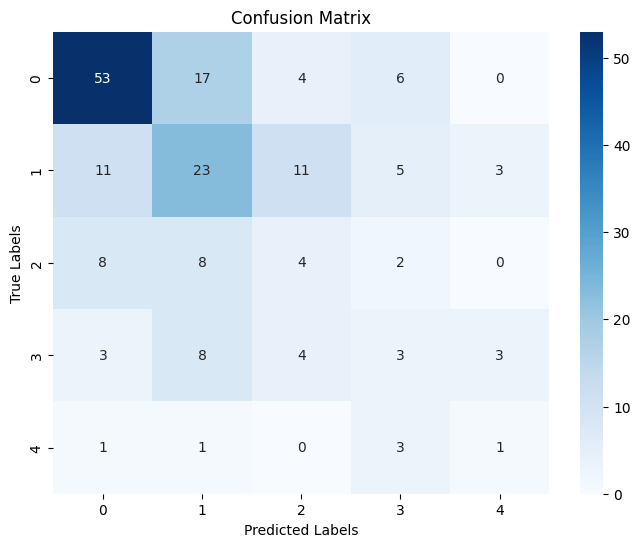

In [24]:
# Evaluate the Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
accuracy = accuracy_score(y_test,y_pred)*100
precision = precision_score(y_test,y_pred,average='weighted')*100
recall = recall_score(y_test,y_pred,average='weighted')*100
f1 = f1_score(y_test,y_pred,average='weighted')*100

# Chck if there are atleast two unique classes before calculating ROC-AUC
if len(np.unique(y_test)) > 1:
  y_prob = dt.predict_proba(x_test)
  roc_auc = roc_auc_score(y_test,y_prob, multi_class='ovr',average='weighted')*100
else:
  roc_auc = np.nan

print("\n     Initial Decision Tree Performance     ")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

if not np.isnan(roc_auc):
    print(f"ROC-AUC: {roc_auc:.4f}")
else:
    print("ROC-AUC is not applicable for binary classification.")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test,y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# **Task 5 : Hyperparameter Tuning**

**Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.**

In [25]:
from sklearn.model_selection import GridSearchCV

# Define parameter Grid
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10, 15, 20, None],
    'min_samples_split' : [2, 5, 10,15],
    'min_samples_leaf' : [1, 2, 5, 10],
    'max_features' : ['auto', 'sqrt', 'log2', None]
}

In [26]:
# Implement GridSearchCV
grid_search=GridSearchCV(
    DecisionTreeClassifier(random_state=42),param_grid=param_grid, cv=5, scoring='accuracy',n_jobs=-1,verbose=1)

# Perform Grid_SearchCV
print("Starting hyperparameter tuning...")
grid_search.fit(x_train,y_train)

Starting hyperparameter tuning...
Fitting 5 folds for each of 896 candidates, totalling 4480 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, 15, 20, None],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='accuracy', verbose=1)

In [27]:
# Get best parameters and model
best_params=grid_search.best_params_
best_dt_classifier= grid_search.best_estimator_
print(f"Best Parameters:\n {best_params}")

Best Parameters:
 {'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [28]:
# Evaluate the model
y_tuned_pred= best_dt_classifier.predict(x_test)

accuracy_tuned = accuracy_score(y_test,y_tuned_pred)*100
precision_tuned = precision_score(y_test,y_tuned_pred,average='weighted')*100
recall_tuned = recall_score(y_test,y_tuned_pred,average='weighted')*100
f1_tuned = f1_score(y_test,y_tuned_pred,average='weighted')*100

print("\n    Tuned Decision Tree Performance    ")
print(f"Accuracy: {accuracy_tuned:.4f}")
print(f"Precision: {precision_tuned:.4f}")
print(f"Recall: {recall_tuned:.4f}")


    Tuned Decision Tree Performance    
Accuracy: 50.5495
Precision: 42.5022
Recall: 50.5495


In [29]:
# Compare performance
improvement = accuracy_tuned - accuracy
print(f"Improvement in Accuracy: {improvement:.4f}")

Improvement in Accuracy: 4.3956


# **Task 6 : Model Evaluation and Analysis**

**Analyse the performance of the Decision Tree model using the evaluation metrics obtained.**

In [30]:
# Feature important analysis
feature_importance = pd.DataFrame({
    'feature' : x.columns,
    'importance' : best_dt_classifier.feature_importances_
}).sort_values('importance', ascending=False)

print("\n Feature Importance Analysis:")
print(feature_importance)


 Feature Importance Analysis:
     feature  importance
2         cp    0.562547
4       chol    0.176597
0        age    0.152926
8      exang    0.087281
3   trestbps    0.020649
1        sex    0.000000
6    restecg    0.000000
5        fbs    0.000000
7     thalch    0.000000
9    oldpeak    0.000000
10     slope    0.000000
11      thal    0.000000


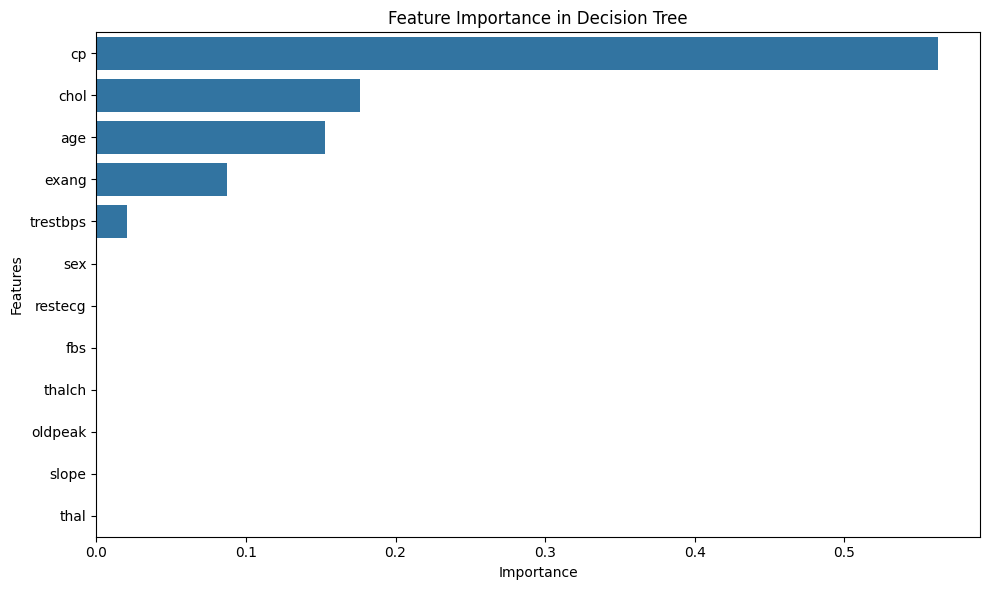

In [31]:
# Visualize the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

**Visualize the decision tree structure to understand the rules learned by the model and identify important features**

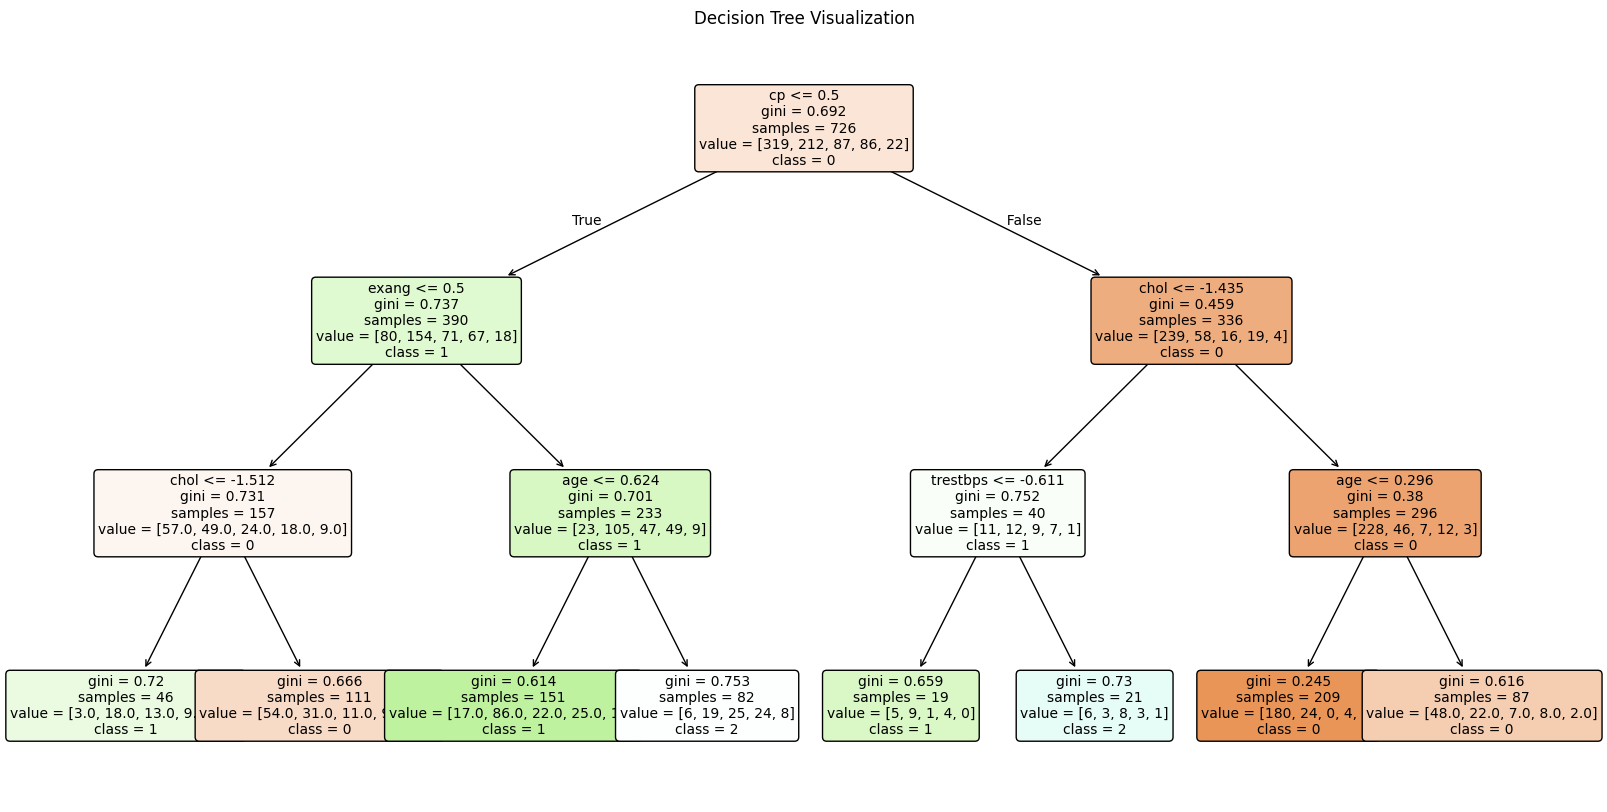

In [32]:
# Visualize the decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(best_dt_classifier, filled=True, feature_names=x.columns, class_names=[str(i) for i in sorted(y.unique())], rounded=True, max_depth=3, fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()

In [33]:
# Deatiled Analysis of prediction
results_df= pd.DataFrame({
    'Actual' : y_test,
    'Predicted' : y_pred
})
results_df['Correct'] = results_df['Actual'] == results_df['Predicted']

print("\n Detailed Analysis of Predictions:\n")
print(f"Total predictions:{len(results_df)}")
print(f"Correct predictions: {results_df['Correct'].sum()}\n")
print(f"Accuracy by class:")
accuracy_by_class=results_df.groupby('Actual')['Correct'].mean()
print(accuracy_by_class)


 Detailed Analysis of Predictions:

Total predictions:182
Correct predictions: 84

Accuracy by class:
Actual
0    0.662500
1    0.433962
2    0.181818
3    0.142857
4    0.166667
Name: Correct, dtype: float64


In [34]:
# Cross-Validation score for more robust evaluation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_dt_classifier, x, y, cv=5, scoring='accuracy')
print(f"\nCross-Validation Scores:{cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")


Cross-Validation Scores:[0.47802198 0.53846154 0.47252747 0.58563536 0.47513812]
Mean CV Accuracy: 0.5100 (+/- 0.0902)


# **Interview Questions**

**1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?**

Ans :- Decision tree models have several hyperparameters that can be tuned to control their complexity and improve performance. Here are some common ones:

1) **criterion**: This determines the function to measure the quality of a split. Common options are:
* 'gini' for the Gini impurity.
* 'entropy' for the information gain. Choosing between them can sometimes impact performance, though often the difference is minimal.
2) **max_depth**: This limits the maximum depth of the tree. A deeper tree can capture more complex relationships but is more prone to overfitting. A shallower tree is less likely to overfit but might not capture all the nuances in the data.

3) **min_samples_split**: This specifies the minimum number of samples required to split an internal node. A higher value prevents the tree from splitting on small groups of samples, which can help reduce overfitting.

4) **min_samples_leaf**: This is the minimum number of samples required to be at a leaf node. Similar to min_samples_split, a higher value helps prevent the tree from creating leaves with very few samples, reducing overfitting.

5) **max_features**: This is the number of features to consider when looking for the best split.
* 'auto' or 'sqrt': Considers sqrt(n_features) features at each split.
* 'log2': Considers log2(n_features) features at each split.
* None: Considers all features. Limiting the number of features considered at each split can help reduce variance and prevent overfitting, especially when dealing with a large number of features.
6) **splitter**: This determines the strategy used to choose the split at each node.
* 'best': Chooses the best split.
* 'random': Chooses the best random split. 'random' can introduce more randomness into the tree building process, which can be useful for creating ensembles of trees.

Tuning these hyperparameters is crucial for finding a balance between bias and variance, leading to a model that generalizes well to unseen data.

**2. What is the difference between the Label encoding and One-hot encoding?**

Ans :- Label Encoding and One-Hot Encoding are both techniques used to convert categorical data into numerical formats that machine learning algorithms can understand. Here's the difference:

**Label Encoding**:
* Assigns a unique integer to each category.
* For example, if you have a column with categories "Red", "Green", "Blue", Label Encoding might assign 0 to "Red", 1 to "Green", and 2 to "Blue".
* This method can introduce an artificial ordinal relationship between the categories, which might not be appropriate for nominal (unordered) categorical data. It can imply that "Green" (1) is somehow "greater than" "Red" (0), which is not true in this example.

**One-Hot Encoding**:
* Creates new binary columns for each category in the original column.
* For example, for the "Red", "Green", "Blue" column, One-Hot Encoding would create three new columns: "Red", "Green", and "Blue".
* For each row, the corresponding category's column will have a value of 1, and all other new columns will have a value of 0.
* This method avoids the issue of introducing artificial ordinal relationships and is generally preferred for nominal categorical data.

**When to use which**:
* Label Encoding can be suitable for ordinal categorical data where there is an inherent order (e.g., "Small", "Medium", "Large").
* One-Hot Encoding is generally preferred for nominal categorical data where there is no inherent order.

In summary, the main difference lies in how they represent the categories numerically. Label Encoding uses single integers, potentially introducing ordinal bias, while One-Hot Encoding uses binary vectors, avoiding this bias.